In [16]:
#!pip install tensorflow

In [17]:
import tensorflow as tf

In [18]:
print(tf.__version__)

2.4.0


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [20]:
data , y = load_breast_cancer(return_X_y=True , as_frame=True)

In [21]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# it is mandatory to scale the data before building ANN

In [22]:
min_max = MinMaxScaler()

In [23]:
data = pd.DataFrame(min_max.fit_transform(data), columns= data.columns)

In [24]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train , x_test ,y_train ,y_test = train_test_split(data ,y, test_size=0.2, random_state=12)

In [27]:
model = Sequential() #create a sequence to add the NN layers 

In [30]:
model.add(Dense(30, input_shape=(30,),activation = 'relu')) # create first hidden layer having 30 neurons

In [31]:
model.add(Dense(20, activation = 'relu')) # create second hidden layers having 20 neurons

In [32]:
model.add(Dense(1, activation='sigmoid')) # output layer having one neuron

In [35]:
model.compile(optimizer='adam' , loss ='binary_crossentropy', metrics='Accuracy')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train, epochs=100 ,validation_data= (x_test,y_test) )

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 8/100
1

Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 60/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 61/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 62/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 63/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 64/100
15/15 [==============================] - 0s 4ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 9.8652 - accuracy: 0.3604 - val_loss: 8.9302 - val_accuracy: 0.4211
Epoch 

In [39]:
model.predict(x_test)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
confusion_matrix(y_test , model.predict(x_test))

array([[48,  0],
       [66,  0]], dtype=int64)

In [44]:
accuracy_score(y_test , model.predict(x_test))

0.42105263157894735

# new data set

In [47]:
airbnb = pd.read_csv(r'C:\My data\Machine learning data set\airbnb prices.csv')

In [48]:
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [49]:
airbnb.drop(['room_id','survey_id','host_id','name','location'],axis=1,inplace=True)

In [50]:
airbnb.head()

,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude
0,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,2017-07-23 13:06:27.391699,52.356209,4.887491
1,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,2017-07-23 13:06:23.607187,52.378518,4.896120
2,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,2017-07-23 13:06:23.603546,52.338811,4.943592
3,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,2017-07-23 13:06:22.689787,52.376319,4.890028
4,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,2017-07-23 13:06:19.681469,52.370384,4.852873


In [51]:
airbnb.country.unique()

array([nan])

In [53]:
airbnb.drop(['country','city','neighborhood','borough'],axis=1,inplace=True)

In [54]:
airbnb.head()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude
0,Shared room,7,4.5,2,1.0,NaN,156.0,NaN,2017-07-23 13:06:27.391699,52.356209,4.887491
1,Shared room,45,4.5,4,1.0,NaN,126.0,NaN,2017-07-23 13:06:23.607187,52.378518,4.896120
2,Shared room,1,0.0,3,1.0,NaN,132.0,NaN,2017-07-23 13:06:23.603546,52.338811,4.943592
3,Shared room,7,5.0,4,1.0,NaN,121.0,NaN,2017-07-23 13:06:22.689787,52.376319,4.890028
4,Shared room,1,0.0,2,1.0,NaN,93.0,NaN,2017-07-23 13:06:19.681469,52.370384,4.852873


In [55]:
airbnb.isnull().sum()

room_type                   0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
last_modified               0
latitude                    0
longitude                   0
dtype: int64

In [56]:
airbnb.drop(['bathrooms','minstay','last_modified'],axis=1,inplace=True)

In [57]:
airbnb.head()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
0,Shared room,7,4.5,2,1.0,156.0,52.356209,4.887491
1,Shared room,45,4.5,4,1.0,126.0,52.378518,4.896120
2,Shared room,1,0.0,3,1.0,132.0,52.338811,4.943592
3,Shared room,7,5.0,4,1.0,121.0,52.376319,4.890028
4,Shared room,1,0.0,2,1.0,93.0,52.370384,4.852873


In [58]:
airbnb.room_type.unique()

array(['Shared room', 'Entire home/apt', 'Private room'], dtype=object)

In [59]:
airbnb = pd.get_dummies(airbnb,columns=['room_type'],drop_first=True)

In [60]:
airbnb.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,room_type_Private room,room_type_Shared room
0,7,4.5,2,1.0,156.0,52.356209,4.887491,0,1
1,45,4.5,4,1.0,126.0,52.378518,4.896120,0,1
2,1,0.0,3,1.0,132.0,52.338811,4.943592,0,1
3,7,5.0,4,1.0,121.0,52.376319,4.890028,0,1
4,1,0.0,2,1.0,93.0,52.370384,4.852873,0,1


In [61]:
x = airbnb.drop('price', axis=1)
y= airbnb.price

In [63]:
x = pd.DataFrame(min_max.fit_transform(x), columns= x.columns)

In [64]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)

In [65]:
x_train

,reviews,overall_satisfaction,accommodates,bedrooms,latitude,longitude,room_type_Private room,room_type_Shared room
1135,0.058271,1.0,0.1250,0.1,0.579539,0.448233,0.0,0.0
16030,0.016917,0.9,0.0625,0.1,0.471494,0.498652,1.0,0.0
2739,0.056391,1.0,0.1875,0.2,0.583553,0.433718,0.0,0.0
13304,0.007519,1.0,0.0625,0.1,0.684400,0.578886,0.0,0.0
3874,0.030075,1.0,0.0625,0.1,0.600505,0.444300,0.0,0.0
...,...,...,...,...,...,...,...,...
9475,0.067669,0.9,0.1250,0.0,0.554279,0.412400,0.0,0.0
3714,0.005639,1.0,0.1875,0.2,0.802128,0.600219,0.0,0.0
7409,0.022556,0.8,0.0625,0.0,0.534314,0.457684,0.0,0.0
5787,0.018797,0.9,0.1875,0.2,0.688523,0.347520,0.0,0.0


In [81]:
model = Sequential([
    Dense(8,input_shape=(8,),activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

In [82]:
model.compile(optimizer='adam' ,loss='mean_squared_error', metrics='MSE')

In [83]:
hist = model.fit(x_train,y_train,epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
469/469 [==============================] - 1s 1ms/step - loss: 36346.7501 - MSE: 36346.7501 - val_loss: 24796.7090 - val_MSE: 24796.7090
Epoch 2/100
469/469 [==============================] - 0s 892us/step - loss: 20097.8531 - MSE: 20097.8531 - val_loss: 10478.9609 - val_MSE: 10478.9609
Epoch 3/100
469/469 [==============================] - 0s 852us/step - loss: 13533.8331 - MSE: 13533.8331 - val_loss: 9222.3086 - val_MSE: 9222.3086
Epoch 4/100
469/469 [==============================] - 0s 977us/step - loss: 13584.8029 - MSE: 13584.8029 - val_loss: 8572.6592 - val_MSE: 8572.6592
Epoch 5/100
469/469 [==============================] - 0s 957us/step - loss: 9943.0031 - MSE: 9943.0031 - val_loss: 7932.3843 - val_MSE: 7932.3843
Epoch 6/100
469/469 [==============================] - 0s 951us/step - loss: 10157.0991 - MSE: 10157.0991 - val_loss: 7631.4072 - val_MSE: 7631.4072
Epoch 7/100
469/469 [==============================] - 0s 958us/step - loss: 11721.7717 - MSE: 11721.7717 

469/469 [==============================] - 0s 891us/step - loss: 9703.6910 - MSE: 9703.6910 - val_loss: 6260.5317 - val_MSE: 6260.5317
Epoch 57/100
469/469 [==============================] - 0s 976us/step - loss: 11146.8044 - MSE: 11146.8044 - val_loss: 6243.4780 - val_MSE: 6243.4780
Epoch 58/100
469/469 [==============================] - 0s 873us/step - loss: 10367.3697 - MSE: 10367.3697 - val_loss: 6265.8120 - val_MSE: 6265.8120
Epoch 59/100
469/469 [==============================] - 0s 959us/step - loss: 11835.0304 - MSE: 11835.0304 - val_loss: 6266.2603 - val_MSE: 6266.2603
Epoch 60/100
469/469 [==============================] - 0s 871us/step - loss: 8846.7268 - MSE: 8846.7268 - val_loss: 6332.7588 - val_MSE: 6332.7588
Epoch 61/100
469/469 [==============================] - 0s 867us/step - loss: 10138.8143 - MSE: 10138.8143 - val_loss: 6212.2710 - val_MSE: 6212.2710
Epoch 62/100
469/469 [==============================] - 0s 903us/step - loss: 11619.6801 - MSE: 11619.6801 - val_loss

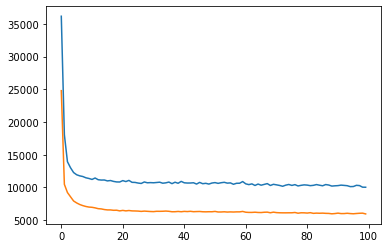

In [87]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])